# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [31]:
# clean the "Price" variable in /sample_data/airbnb_hw.csv
import pandas as pd
import numpy as np
df = pd.read_csv('./sample_data/airbnb_hw.csv')

# Remove commas, dollar signs, and N/As from the "Price" column
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#TEST
#Which row has a price over 999
df_price_test=df[df['Price'] > 999]
print(df_price_test["Price"])

# How many missing values do you end up with?
print(df['Price'].isna().sum())

# I removed commas, and dollar signs, replacing them witha blank







0
101       1990
263       1000
764       1200
1272      1000
1275      5000
1476      3000
1846      1500
1973      1200
1977      1800
2095      1300
2149      1000
2337      1239
2405      5999
2441      1500
2716      1300
2912      1500
3482      2750
3483      4750
3994      1000
4002      8000
4003      4500
4335      1000
4428      1000
4616      2500
4755      1000
4756      1000
4781      3750
5088      1000
5294      1500
5404      1000
5407      1000
5623      1500
6336      1000
6467      2000
6788      1000
7018      1500
7118      1750
7149      1000
7208      1500
7368      1495
7374      1700
7544      1000
7550      5000
7629      1999
7780      1000
7853      1170
8141      1100
8285      3000
8507      1000
8663      1111
8702      1000
9253      1000
9578      1174
10237     4000
10600     1100
11173     1000
11227     2500
11394     1000
11521     1500
12384     1400
12579     2520
12751     1000
12894     1000
12981     1500
13165     1000
13350     1200
13475   

In [32]:
df_force = pd.read_csv('./sample_data/mn_police_use_of_force.csv')
df_force.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [33]:
import numpy as np

# Inspect unique values in 'subject_injury' before cleaning
print("Unique values before cleaning:\n", df_force['subject_injury'].unique())

# Convert to string to handle potential mixed types and then to lowercase for easier comparison
df_force['subject_injury'] = df_force['subject_injury'].astype(str).str.lower()

# Map values to 'Yes', 'No', or np.nan
# Assuming anything not explicitly 'yes' or 'no' (including 'nan' string) should be np.nan
df_force['subject_injury'] = df_force['subject_injury'].apply(lambda x: 'Yes' if 'yes' in x else ('No' if 'no' in x else np.nan))

# Verify unique values after cleaning
print("\nUnique values after cleaning:\n", df_force['subject_injury'].unique())

# Calculate the proportion of missing values
missing_proportion = df_force['subject_injury'].isna().sum() / len(df_force)
print(f"\nProportion of missing values in 'subject_injury': {missing_proportion:.2%}")

# Cross-tabulate cleaned 'subject_injury' with 'force_type'
crosstab_result = pd.crosstab(df_force['force_type'], df_force['subject_injury'], dropna=False)
print("\nCross-tabulation of 'force_type' and cleaned 'subject_injury':\n", crosstab_result)

Unique values before cleaning:
 [nan 'No' 'Yes']

Unique values after cleaning:
 [nan 'No' 'Yes']

Proportion of missing values in 'subject_injury': 76.19%

Cross-tabulation of 'force_type' and cleaned 'subject_injury':
 subject_injury                 No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Year description after cleaning and filtering:
count    5538.000000
mean     1992.408451
std        24.225247
min      1940.000000
25%      1970.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64

Number of missing 'Age' values before dropping for histogram: 1916

Age description after cleaning:
count    3622.000000
mean       28.613749
std        14.822755
min         1.000000
25%        17.000000
50%        25.000000
75%        37.750000
max        87.000000
Name: Age, dtype: float64

Plotting histogram for 'Age'...

Proportion of victims who are male: 78.60%

Value counts of 'Type' column AFTER final categorization (using map/fillna):
Type
Unprovoked    4126
Unknown        889
Provoked       523
Name: count, dtype: int64

Proportion of unprovoked attacks: 74.50%

Columns in DataFrame before processing 'Fatal Y/N': ['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Sp

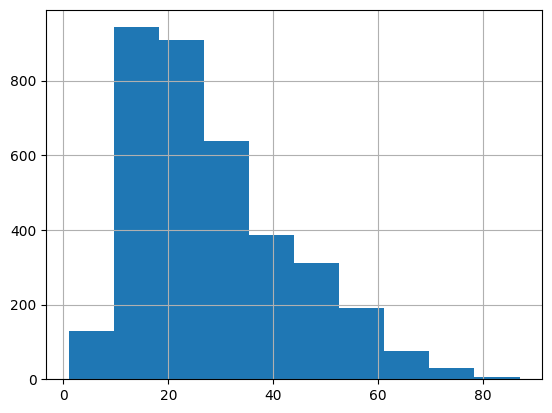

In [61]:
# open the GSAF5 excel file with Pandas
import pandas as pd
import numpy as np
df_shark = pd.read_excel('./sample_data/GSAF5.xls')


# drop columns that do not contain data
df_shark = df_shark.dropna(axis=1, how='all')
df_shark.head()

# Clean the year variable (it is in DAYth month format). Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
df_shark['Year'] = pd.to_datetime(df_shark['Year'], format='%Y', errors='coerce')
df_shark['Year'] = df_shark['Year'].dt.year
df_shark = df_shark[df_shark['Year'] >= 1940]
print("Year description after cleaning and filtering:")
print(df_shark['Year'].describe())

# clean age variable and make historgram of ages of victims
# Convert 'Age' to numeric, coercing errors to NaN
df_shark['Age'] = pd.to_numeric(df_shark['Age'], errors='coerce')

# Drop rows where 'Age' is NaN or fill them with a suitable value before plotting
# For histogram, it's often best to drop NaNs or impute if appropriate for the analysis.
# Let's drop NaNs for a clean histogram for now.
print("\nNumber of missing 'Age' values before dropping for histogram:", df_shark['Age'].isna().sum())
df_shark_age_cleaned = df_shark.dropna(subset=['Age'])

print("\nAge description after cleaning:")
print(df_shark_age_cleaned['Age'].describe())

# Plot histogram of cleaned 'Age' variable
print("\nPlotting histogram for 'Age'...")
df_shark_age_cleaned['Age'].hist()

#What proportion of victims are male?
# First, let's clean column names to remove any leading/trailing spaces
df_shark.columns = df_shark.columns.str.strip()

# Now, check for the 'Sex' column and proceed
if 'Sex' in df_shark.columns:
    df_shark_male = df_shark[df_shark['Sex'] == 'M']
    proportion_male = len(df_shark_male) / len(df_shark)
    print(f"\nProportion of victims who are male: {proportion_male:.2%}")
else:
    print("Column 'Sex' not found after cleaning column names.")
    print("Available columns:", df_shark.columns.tolist())

# Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
#make "Type" variable only have "Provoked" "Unprovoked" and "Unknown"
df_shark['Type'] = df_shark['Type'].astype(str).str.strip().str.lower()

# Map common variations to the desired categories
type_mapping = {
    'provoked': 'Provoked',
    'unprovoked': 'Unprovoked'
}

# Apply mapping, set everything else to 'Unknown'
df_shark['Type'] = df_shark['Type'].map(type_mapping).fillna('Unknown')

# Add this line to inspect values AFTER categorization
print("\nValue counts of 'Type' column AFTER final categorization (using map/fillna):")
print(df_shark['Type'].value_counts(dropna=False))

# Calculate the proportion of unprovoked attacks
proportion_unprovoked = (df_shark['Type'] == 'Unprovoked').sum() / len(df_shark)
print(f"\nProportion of unprovoked attacks: {proportion_unprovoked:.2%}")

# Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.
# Print current columns to debug KeyError
print("\nColumns in DataFrame before processing 'Fatal Y/N':", df_shark.columns.tolist())

# Standardize 'Fatal Y/N' column to 'Y', 'N', or 'Unknown'
df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].astype(str).str.strip().str.upper()

fatal_mapping = {
    'Y': 'Y',
    'N': 'N'
}

df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].map(fatal_mapping).fillna('Unknown')

print("\nValue counts of 'Fatal Y/N' column after cleaning:")
print(df_shark['Fatal Y/N'].value_counts(dropna=False))

# Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?



In [66]:

# Filter for unprovoked attacks
df_unprovoked = df_shark[df_shark['Type'] == 'Unprovoked']

# Calculate value counts for 'Sex' in unprovoked attacks
sex_counts_unprovoked = df_unprovoked['Sex'].value_counts(dropna=False)

# Calculate proportions
total_unprovoked_attacks = len(df_unprovoked)
proportion_sex_unprovoked = sex_counts_unprovoked / total_unprovoked_attacks

print("Proportion of unprovoked attacks by sex:")
print(proportion_sex_unprovoked)


# Clean the 'Sex' column first
df_shark['Sex'] = df_shark['Sex'].astype(str).str.strip().str.upper()
df_shark['Sex'] = df_shark['Sex'].replace({'M': 'M', 'F': 'F', np.nan: 'Unknown', 'NAN': 'Unknown'}) # Handle both actual NaN and 'NAN' string
df_shark.loc[~df_shark['Sex'].isin(['M', 'F', 'Unknown']), 'Sex'] = 'Unknown'

# Filter for unprovoked attacks again after cleaning 'Sex'
df_unprovoked = df_shark[df_shark['Type'] == 'Unprovoked']

# Calculate value counts for 'Sex' in unprovoked attacks
sex_counts_unprovoked = df_unprovoked['Sex'].value_counts(dropna=False)

# Calculate proportions
total_unprovoked_attacks = len(df_unprovoked)
proportion_sex_unprovoked = sex_counts_unprovoked / total_unprovoked_attacks

print("Cleaned 'Sex' column value counts for unprovoked attacks:")
print(sex_counts_unprovoked)
print("\nProportion of unprovoked attacks by sex after cleaning:")
print(proportion_sex_unprovoked)

# Create a cross-tabulation between 'Type' and 'Fatal Y/N'
crosstab_fatal_type = pd.crosstab(df_shark['Type'], df_shark['Fatal Y/N'], dropna=False)

print("Cross-tabulation of Attack Type and Fatal Outcome:")
print(crosstab_fatal_type)

# Calculate the proportion of fatal outcomes for 'Provoked' attacks
provoked_fatal_y = crosstab_fatal_type.loc['Provoked', 'Y']
provoked_fatal_n = crosstab_fatal_type.loc['Provoked', 'N']
provoked_total_known = provoked_fatal_y + provoked_fatal_n
proportion_provoked_fatal = provoked_fatal_y / provoked_total_known if provoked_total_known > 0 else 0

# Calculate the proportion of fatal outcomes for 'Unprovoked' attacks
unprovoked_fatal_y = crosstab_fatal_type.loc['Unprovoked', 'Y']
unprovoked_fatal_n = crosstab_fatal_type.loc['Unprovoked', 'N']
unprovoked_total_known = unprovoked_fatal_y + unprovoked_fatal_n
proportion_unprovoked_fatal = unprovoked_fatal_y / unprovoked_total_known if unprovoked_total_known > 0 else 0

print(f"\nProportion of fatal outcomes for Provoked attacks: {proportion_provoked_fatal:.2%}")
print(f"Proportion of fatal outcomes for Unprovoked attacks: {proportion_unprovoked_fatal:.2%}")


# Create a cross-tabulation between 'Sex' and 'Fatal Y/N'
crosstab_fatal_sex = pd.crosstab(df_shark['Sex'], df_shark['Fatal Y/N'], dropna=False)

print("Cross-tabulation of Victim Sex and Fatal Outcome:")
print(crosstab_fatal_sex)

# Calculate the proportion of fatal outcomes for Male victims
male_fatal_y = crosstab_fatal_sex.loc['M', 'Y']
male_fatal_n = crosstab_fatal_sex.loc['M', 'N']
male_total_known = male_fatal_y + male_fatal_n
proportion_male_fatal = male_fatal_y / male_total_known if male_total_known > 0 else 0

# Calculate the proportion of fatal outcomes for Female victims
female_fatal_y = crosstab_fatal_sex.loc['F', 'Y']
female_fatal_n = crosstab_fatal_sex.loc['F', 'N']
female_total_known = female_fatal_y + female_fatal_n
proportion_female_fatal = female_fatal_y / female_total_known if female_total_known > 0 else 0

print(f"\nProportion of fatal outcomes for Male victims: {proportion_male_fatal:.2%}")
print(f"Proportion of fatal outcomes for Female victims: {proportion_female_fatal:.2%}")

Proportion of unprovoked attacks by sex:
Sex
M          0.815802
F          0.149782
Unknown    0.034416
Name: count, dtype: float64
Cleaned 'Sex' column value counts for unprovoked attacks:
Sex
M          3366
F           618
Unknown     142
Name: count, dtype: int64

Proportion of unprovoked attacks by sex after cleaning:
Sex
M          0.815802
F          0.149782
Unknown    0.034416
Name: count, dtype: float64
Cross-tabulation of Attack Type and Fatal Outcome:
Fatal Y/N      N  Unknown    Y
Type                          
Provoked     501        9   13
Unknown      366      400  123
Unprovoked  3379       53  694

Proportion of fatal outcomes for Provoked attacks: 2.53%
Proportion of fatal outcomes for Unprovoked attacks: 17.04%
Cross-tabulation of Victim Sex and Fatal Outcome:
Fatal Y/N     N  Unknown    Y
Sex                          
F           574       59   92
M          3374      323  662
Unknown     298       80   76

Proportion of fatal outcomes for Male victims: 16.40%
Pro

In [67]:
# Clean the 'Species' column by converting to string and lowercasing
df_shark['Species_cleaned'] = df_shark['Species'].astype(str).str.lower()

# Identify rows where 'Species_cleaned' contains 'white shark'
white_shark_attacks = df_shark[df_shark['Species_cleaned'].str.contains('white shark', na=False)]

# Calculate the proportion of white shark attacks
proportion_white_shark = len(white_shark_attacks) / len(df_shark)

print(f"Proportion of attacks attributed to white sharks: {proportion_white_shark:.2%}")


Proportion of attacks attributed to white sharks: 12.01%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

### 1.Read the abstract. What is this paper about?
Despite cleaning data taking the majority of a data scientist's time, studies have neglected it. In studying it, which this paper will do, the process can be more effective and efficient.
### 2.Read the introduction. What is the "tidy data standard" intended to accomplish?
The tidy data standard is intended to "facilitate initial exploration and analysis of the data, and to simplify the development of data anlysis tools."
### 3.Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
Seeing as you standardize a dataset to make it tidy, they have gone through similar processes and are relatively the same format. Messy datasets can be messy in an infinite number of ways, on the otherhand. It is also easier to define relationships, allowing us to determine observations/variables. When we try to find them on their own, however, it can be more vague.
### 4.Read Section 2.2. How does Wickham define values, variables, and observations?
Value: quantiative or qualitative data that describes an observation
Observation: self-evident (collection of values)
Variable: all values that measure the same underlying attribute with the same unit
### 5.How is "Tidy Data" defined in section 2.3?
Each variable forms a column, each observation forms a row, and each type of observational unit forms a table
### 6.Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
a.) Column headers are values, not variable names
b.) Multiple variables stored in one column
c.) Variables are stored in both rows and columns
d.) Multiple type of obbservational units are stored in the same table
e.) A single observational unit is stored in multiple tables.
Three columns hav ebeen ommitted, and the dataset has 3 variables. Melting a dataset requires turning columns into rows
### 7.Why, specifically, is table 11 messy but table 12 tidy and "molten"?
Table 11 has variables in individual columns and months with less than 31 days have structural values missing. Table 12 fixes this by convert month a day to a date, and then isolating variables.
### 8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
Tidy tools are inexplicably linked to tidy data. Wickham hopes that others will build on this framework to develop even better data storage strategies and better tools.

